In [2]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



import folium
import warnings
warnings.filterwarnings("ignore")
from bokeh.plotting import figure, show
from bokeh.tile_providers import get_provider, Vendors

from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from bokeh.io import save, reset_output, output_notebook

TILE = get_provider("STAMEN_TERRAIN_RETINA")
reset_output()
output_notebook()


Loading BokehJS ...

In [3]:
#import data
yellow_data_2015 = pd.read_pickle('../preprocessed_data/drop_yellow_tripdata_2015.pkl')

In [ ]:
#missing value detect
yellow_data_2015.isnull().sum()

In [24]:
#attributes sets
COORDS = ['pickup_longitude','pickup_latitude', 'dropoff_longitude','dropoff_latitude']
PU_COORDS= ['pickup_latitude','pickup_longitude']
DO_COORDS= ['dropoff_latitude','dropoff_longitude']
longitude_message=['pickup_longitude', 'dropoff_longitude']
latitude_message=['pickup_latitude', 'dropoff_latitude']
tip_detail = ['pickup_longitude','pickup_latitude', 'dropoff_longitude','dropoff_latitude','tip_amount']
amount=['fare_amount', 'tip_amount', 'total_amount']
key_colS = ["passenger_count", "trip_distance", "fare_amount", "tip_amount", "total_amount"]

In [6]:
#Venue: Madison Square Garden and BARCLAYS CENTER
MSG_Venue_coord=[40.750298, -73.993324]
BC_Venue_coord=[40.68265, -73.97469]
MSG_Venue_coordM=np.array(MSG_Venue_coord)
BC_Venue_coordM=np.array(BC_Venue_coord)

In [7]:
Boundary_box=yellow_data_2015[DO_COORDS].describe().loc[['min','max']].values

In [8]:
main_coords=yellow_data_2015[DO_COORDS].describe().loc[['50%']].values[0]

In [9]:
#map range
yRange, xRange = sorted(i[0] for i in Boundary_box), sorted(i[1] for i in Boundary_box)

In [ ]:
# initialise a map
NY_map = folium.Map(location=main_coords, tiles="Stamen Terrain", zoom_start=11)

# show map
folium.Marker(MSG_Venue_coord, popup="<b>Madison Square Garden</b>", icon=folium.Icon(color='green')).add_to(NY_map)
NY_map.save('../plots/map.html')
NY_map

In [11]:
#concert period
Maroon_5_concert_period= yellow_data_2015[(yellow_data_2015["tpep_pickup_datetime"]<'2015-03-06 23:59:59') & 
                                                (yellow_data_2015["tpep_pickup_datetime"]>'2015-03-05 00:00:00')]

In [15]:
Sam_Smith_concert_period= yellow_data_2015[(yellow_data_2015["tpep_pickup_datetime"]<'2015-01-15 23:59:59') & 
                                                (yellow_data_2015["tpep_pickup_datetime"]>'2015-01-15 00:00:00')]

In [16]:
Ariana_grande_concert_period = yellow_data_2015[(yellow_data_2015["tpep_pickup_datetime"]<'2015-03-21 23:59:59') & 
                                                (yellow_data_2015["tpep_pickup_datetime"]>'2015-03-20 00:00:00')]

In [17]:
#sport period
NBA_AllStar_Game_period=yellow_data_2015[(yellow_data_2015["tpep_pickup_datetime"]<'2015-02-15 23:59:59') & 
                                                (yellow_data_2015["tpep_pickup_datetime"]>'2015-02-13 00:00:00')]

In [12]:
concert_days=['01-15','03-05','03-06','03-20','03-21']
sports_days=['02-13','02-14','02-15']
weekend_days=['01-03','01-04','01-10','01-11','01-17','01-18','01-24','01-25','01-31','02-01','02-07',
            '02-08','02-14','02-15','02-21','02-22','02-28','03-01','03-07','03-08','03-14','03-15','03-21','03-22','03-28','03-29']

In [ ]:
# cluster map of the Maroon 5 concert period
Maroon_5_concertM=folium.Map(location=MSG_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(Maroon_5_concert_period[DO_COORDS]).add_to(Maroon_5_concertM)

folium.Marker(MSG_Venue_coord, popup="<b>Madison Square Garden</b>", icon=folium.Icon(color='blue')).add_to(Maroon_5_concertM)
folium.Circle(radius=200,location=MSG_Venue_coord,popup="<b>Madison Square Garden</b>",color='#3186',fill=True,).add_to(Maroon_5_concertM)
Maroon_5_concertM.save('../plots/Maroon_5_concert_cluster.html')

Maroon_5_concertM

In [ ]:
# cluster map of the Sam Smith concert period
Sam_Smith_concertM=folium.Map(location=MSG_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(Sam_Smith_concert_period[DO_COORDS]).add_to(Sam_Smith_concertM)

folium.Marker(MSG_Venue_coord, popup="<b>Madison Square Garden</b>", icon=folium.Icon(color='blue')).add_to(Sam_Smith_concertM)
folium.Circle(radius=200,location=MSG_Venue_coord,popup="<b>Madison Square Garden</b>",color='#3186',fill=True,).add_to(Sam_Smith_concertM)
Sam_Smith_concertM.save('../plots/Sam_Smith_concert_cluster.html')

Sam_Smith_concertM

In [ ]:
# cluster map of the Ariana Grande concert period
Ariana_Grande_concertM=folium.Map(location=MSG_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(Ariana_grande_concert_period[DO_COORDS]).add_to(Ariana_Grande_concertM)

folium.Marker(MSG_Venue_coord, popup="<b>Madison Square Garden</b>", icon=folium.Icon(color='blue')).add_to(Ariana_Grande_concertM)
folium.Circle(radius=200,location=MSG_Venue_coord,popup="<b>Madison Square Garden</b>",color='#3186',fill=True,).add_to(Ariana_Grande_concertM)
Ariana_Grande_concertM.save('../plots/Ariana_Grande_concert_cluster.html')

Ariana_Grande_concertM

In [ ]:
# cluster map of the nba all star game period
NBA_AllStar_Game_periodM=folium.Map(location=MSG_Venue_coord, tiles="Stamen Terrain", zoom_start=15)
FastMarkerCluster(NBA_AllStar_Game_period[DO_COORDS]).add_to(NBA_AllStar_Game_periodM)

folium.Marker(MSG_Venue_coord, popup="<b>Madison Square Garden</b>", icon=folium.Icon(color='blue')).add_to(NBA_AllStar_Game_periodM)
folium.Circle(radius=200,location=MSG_Venue_coord,popup="<b>Madison Square Garden</b>",color='#3186',fill=True,).add_to(NBA_AllStar_Game_periodM)
NBA_AllStar_Game_periodM.save('../plots/Yellow_taxi_NBA_AllStar_Game_cluster.html')

NBA_AllStar_Game_periodM

Will weekend increase the demand of taxi?

In [14]:
#count by date
yellow_data_2015['date']=yellow_data_2015["tpep_pickup_datetime"].str[5:10]
date_count=yellow_data_2015['date'].value_counts().sort_index()

In [15]:
#count by time
yellow_data_2015['time']=yellow_data_2015["tpep_pickup_datetime"].str[11:13]+':00'
time_count=yellow_data_2015['time'].value_counts().sort_index()

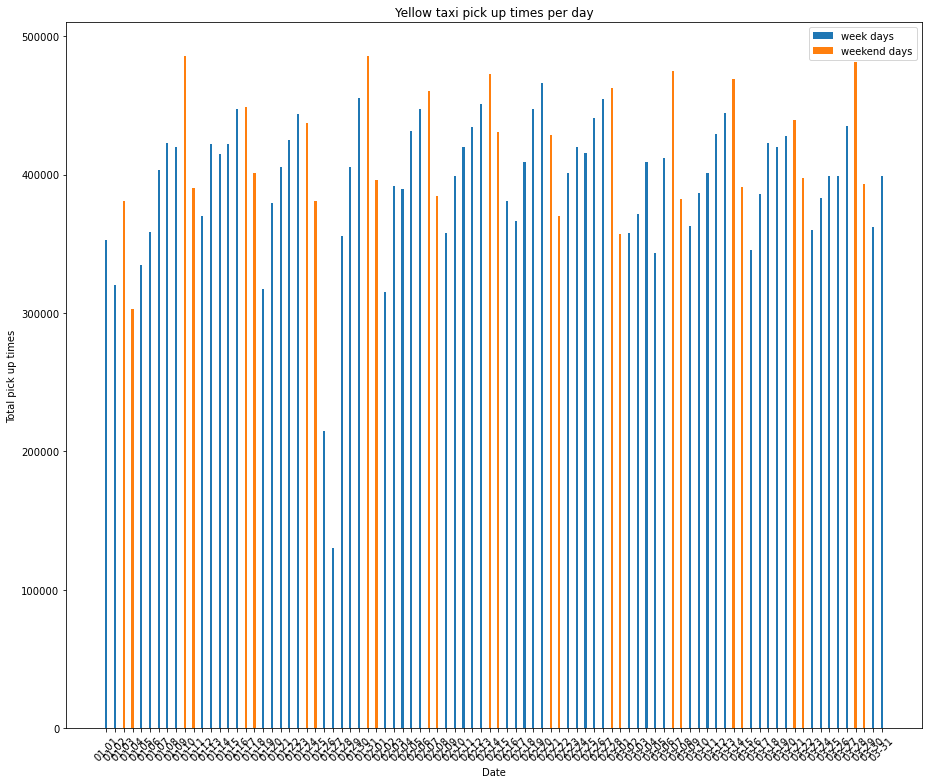

In [16]:
#highlight the weekend and weekday demand
days_bar_count=date_count
for i in range(len(days_bar_count)):
    if (days_bar_count.index[i] not in weekend_days):
        days_bar_count[days_bar_count.index[i]]=0

labels= date_count.index
date_count=yellow_data_2015['date'].value_counts().sort_index()

x=np.arange(len(labels))

width=0.25

fig, ax = plt.subplots(1, 1, figsize=(13, 11))
work_bar=ax.bar(x, date_count,width,label='week days')
weekend_day_bar=ax.bar(x, days_bar_count,width, label='weekend days')

ax.set_ylabel("Total pick up times")
ax.set_title("Yellow taxi pick up times per day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
fig.tight_layout()

plt.savefig('../plots/Yellow taxi pick up times per day.jpeg')
plt.show()


What will affect the tip amount?

In [17]:
#select the data with tip
yellow_data_2015=yellow_data_2015[(yellow_data_2015["payment_type"]==1)]

In [18]:
#data engineering 
tip_count_date=yellow_data_2015.groupby("date")["tip_amount"].sum()
tip_count_time=yellow_data_2015.groupby("time")["tip_amount"].sum()
date_count=yellow_data_2015['date'].value_counts().sort_index()
time_count=yellow_data_2015['time'].value_counts().sort_index()
avg_tip_day=tip_count_date/date_count
avg_tip_time=tip_count_time/time_count

In [19]:
weekend_bar_count=avg_tip_day.copy()
weekday_bar_count=avg_tip_day.copy()
concert_bar_count=avg_tip_day.copy()
sports_bar_count=avg_tip_day.copy()

In [20]:
for i in range(len(weekend_bar_count)):
    if (weekend_bar_count.index[i] not in weekend_days):
        weekend_bar_count[weekend_bar_count.index[i]]=0

for i in range(len(concert_bar_count)):
    if (concert_bar_count.index[i] not in concert_days):
        concert_bar_count[concert_bar_count.index[i]]=0

for i in range(len(sports_bar_count)):
    if (sports_bar_count.index[i] not in sports_days):
        sports_bar_count[sports_bar_count.index[i]]=0

In [ ]:
#Yellow taxi avg tip per da
new_labels=avg_tip_day.index
x=np.arange(len(new_labels))
width=0.2

fig, ax = plt.subplots(1, 1, figsize=(14, 11))
weekday_bar=ax.bar(x, weekday_bar_count,width,label='week days')
weekend_day_bar=ax.bar(x, weekend_bar_count,width, label='weekend days')
concert_day_bar=ax.bar(x, concert_bar_count,width, label='concert days')
sport_day_bar=ax.bar(x, sports_bar_count,width, label='sport days')

ax.set_ylabel("Avg tip")
ax.set_title("Yellow taxi avg tip per day")
ax.set_xticks(x)
ax.set_xlabel("Date")
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
fig.tight_layout()

plt.savefig('../plots/Yellow taxi avg tip per day.jpeg')
plt.show()

In [ ]:
#Yellow taxi Average Tips and Total tips by time
fig, ax=plt.subplots(figsize=(9,6),sharex=True)
ax1=ax.twinx()

total=ax.plot(tip_count_time,'C0-',label='Total tips')
avg=ax1.plot(avg_tip_time,'C1-',label='Average Tips')
ax1.set_ylabel('Averge tips per trip')
ax.set_xticklabels(time_count.index,rotation=45)

ax.legend(avg+total,['Average Tips','Total Tips'],loc=0)
ax.set_xlabel("Time (h)")
ax.set_ylabel('Total Tips')
ax.set_title('Yellow taxi Average Tips and Total tips by time')

fig.tight_layout()
plt.show()
fig.savefig('../plots/Yellow taxi Average Tips and Total tips by time.jpeg')